<a href="https://colab.research.google.com/github/Darktechie-programmer/Deep_learning_projects/blob/master/covid_19_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Corona classification model
#####  dataset link:
1. For normal chest X-ray dataset link : https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
2. For covid19 X-ray dataset link : https://github.com/ieee8023/covid-chestxray-dataset


##### For creating the covid19 datset check the covid19-preprocessing file.....

In [1]:
### mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
### All command related to create connection b/w the kaggle and colab for normal chest X-ray..

## install the dependencies
!pip install kaggle

## upload the link and key for the kaggle connection
from google.colab import files
files.upload()

## add the folder 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

## change the permission 
!chmod 600 ~/.kaggle/kaggle.json

# add the my username in kaggle
!kaggle kernels list — user techieamit  — sort-by dateRun

### download or can say link the dataset to colab 
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

## unzip the dataset
!unzip -q chest-xray-pneumonia.zip -d .    ## "." means --> all files

Saving kaggle.json to kaggle.json
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: — user techieamit — sort-by dateRun
100% 2.29G/2.29G [00:19<00:00, 84.1MB/s]
100% 2.29G/2.29G [00:19<00:00, 124MB/s] 


In [10]:
## Sampling the image from kaggle dataset folder...
import random
import os,shutil
kaggle_file_path = "/content/chest_xray/train/NORMAL"
target_normal_dir = "/content/drive/My Drive/datas/covid_Classification_Dataset/normal"
# target_covid_dir = "/content/drive/My Drive/datas/covid_Classification_Dataset/covid"

In [9]:
## check the image size..
image_names = os.listdir(kaggle_file_path)
len(image_names)

1341

In [6]:
### shuffle the images in the dataset
random.shuffle(image_names)

In [ ]:
#  add the image data into the drive covid_Classification_Dataset folder
for i in range(311):
  image_name = image_names[i]
  image_path = os.path.join(kaggle_file_path,image_name)

  target_path = os.path.join(target_normal_dir,image_name)
  shutil.copy2(image_path,target_path)
  print("Coping image",i)

In [19]:
### for the train and validation folder add the images..
### here my real data
kaggle_file_path_covid = '/content/drive/My Drive/datas/covid_Classification_Dataset/covid'
kaggle_file_path_normal = '/content/drive/My Drive/datas/covid_Classification_Dataset/normal'

## for train dataset
target_path_train_covid = '/content/drive/My Drive/datas/covid_Classification_Dataset/train/covid'
target_path_train_normal = '/content/drive/My Drive/datas/covid_Classification_Dataset/train/normal'

## for validation dataset
target_path_val_covid = '/content/drive/My Drive/datas/covid_Classification_Dataset/val/covid'
target_path_val_normal = '/content/drive/My Drive/datas/covid_Classification_Dataset/val/normal'

In [15]:
## check the total images..
image_covid = os.listdir(kaggle_file_path_covid)
image_normal = os.listdir(kaggle_file_path_normal)
len(image_covid),len(image_normal)

(311, 311)

In [16]:
# kaggle covid data --> train and val --> covid folder
for i in range(311):
  image_train_covid = image_covid[i]
  image_path_covid = os.path.join(kaggle_file_path_covid,image_train_covid)

  target_path_covid = os.path.join(target_path_train_covid,image_train_covid)
  target_path_covid2 = os.path.join(target_path_val_covid,image_train_covid)
  shutil.copy2(image_path_covid,target_path_covid)
  shutil.copy2(image_path_covid,target_path_covid2)
  print("Coping image",i)

In [ ]:
# kaggle normal data --> train and val --> normal folder
for i in range(311):
  image_train_normal = image_normal[i]
  image_path_normal = os.path.join(kaggle_file_path_normal, image_train_normal)

  target_path_normal = os.path.join(target_path_train_normal,image_train_normal)
  target_path_normal2 = os.path.join(target_path_val_normal,image_train_normal)

  shutil.copy2(image_path_normal,target_path_normal)
  shutil.copy2(image_path_normal,target_path_normal2)
  print("Coping image",i)

In [2]:
# path where the train and validation data are presents
train_path = '/content/drive/My Drive/datas/covid_Classification_Dataset/train'
val_path = '/content/drive/My Drive/datas/covid_Classification_Dataset/val'

In [3]:
## import the necessary libraries...
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import  *
from keras.preprocessing import  image

In [4]:
## Build CNN Based Model in keras
# add Sequential
model = Sequential()

## add layes.. 
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## add layes.. 
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## add layes.. 
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

## now flat the image
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

## last layer / softmax layer
model.add(Dense(1,activation='sigmoid'))

In [5]:
## compile the model
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
## chcek the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [7]:
# train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [8]:
## create for the load the dataset in to the RAM in batches...
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 622 images belonging to 2 classes.


In [9]:
## check the label
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [10]:
##  for validation batch size
validation_generator = train_datagen.flow_from_directory(
    val_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 622 images belonging to 2 classes.


In [11]:
## fit the model
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data = validation_generator,
    validation_steps = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 155s 19s/step - loss: 1.1105 - accuracy: 0.5462 - val_loss: 0.6794 - val_accuracy: 0.7344
Epoch 2/10
8/8 [==============================] - 78s 10s/step - loss: 0.5525 - accuracy: 0.7269 - val_loss: 0.4896 - val_accuracy: 0.7344
Epoch 3/10
8/8 [==============================] - 50s 6s/step - loss: 0.4784 - accuracy: 0.7812 - val_loss: 0.4387 - val_accuracy: 0.8750
Epoch 4/10
8/8 [==============================] - 35s 4s/step - loss: 0.3319 - accuracy: 0.8697 - val_loss: 0.2477 - val_accuracy: 0.9062
Epoch 5/10
8/8 [==============================] - 33s 4s/step - loss: 0.2227 - accuracy: 0.9102 - val_loss: 0.2252 - val_accuracy: 0.9062
Epoch 6/10
8/8 [==============================] - 25s 3s/step - loss: 0.2110 - accuracy: 0.9336 - val_loss: 0.1643 - val_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 23s 3s/step - loss: 0.2150 - accuracy: 0.92

In [ ]:
## Class Activation Maps
## Grad-CAM

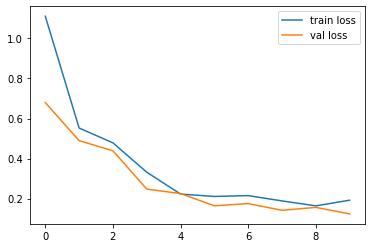

In [12]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

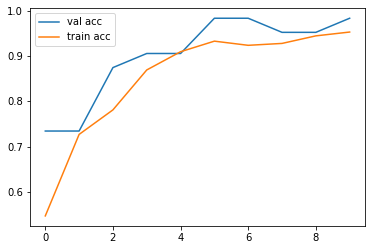

In [13]:
# plot the accuracy
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.plot(hist.history['accuracy'], label='train acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model
## save the model 
model.save('model_covid19.h5')

In [18]:
## these libraries use for load and check the model
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_check = load_model('model_covid19.h5')

In [34]:
## test 1: 
img = image.load_img('/content/drive/My Drive/datas/covid_Classification_Dataset/val/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg',target_size=(224,224))
ans = image.img_to_array(img)
ans = np.expand_dims(ans, axis=0)
img_data = preprocess_input(ans)
classes = model.predict(img_data)
if classes[0][0] <= 0.5:
  print("Oops! You have Corona.")
else:
  print("Great! You don't have Corona.")

Oops! You have Corona.


In [21]:
## test 2: 
img = image.load_img('/content/drive/My Drive/datas/covid_Classification_Dataset/val/normal/IM-0133-0001.jpeg',target_size=(224,224))
ans = image.img_to_array(img)
ans = np.expand_dims(ans, axis=0)
img_data = preprocess_input(ans)
classes = model.predict(img_data)
if classes[0][0] <= 0.5:
  print("Oops! You have Corona.")
else:
  print("Great! You don't have Corona.")

Great! You don't have Corona.


In [36]:
## for image show where is the infacted area in the X-ray...
from fastai.vision import *
from fastai.callbacks.hooks import *
# it's not done yet.....